In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statistics
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

# Import data 

The following data was preprocessed in R, by merging eset_HTA20 and anoSC1_v11_nokey.csv

In [2]:
alldata = pd.read_csv("alldata.csv")

Check the data

In [3]:
alldata.head()

,Unnamed: 0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_32827,g_32828,g_32829,g_32830,SampleID,GA,Batch,Set,Train,Platform
0,1,6.062215,3.796484,5.849338,3.567779,6.166815,4.443027,5.836522,6.330018,4.922339,...,8.972873,10.440245,12.101476,13.695705,Tarca_001_P1A01,11.0,1,PRB_HTA,1,HTA20
1,2,6.125023,3.805305,6.191562,3.452524,5.678373,4.773199,6.143398,5.601745,4.711765,...,9.376194,10.845176,12.370891,13.635522,Tarca_003_P1A03,NaN,1,PRB_HTA,0,HTA20
2,3,5.875502,3.450245,6.550525,3.316134,6.185059,4.393488,5.898364,6.137984,4.628124,...,8.843612,10.493416,12.295786,13.616688,Tarca_004_P1A04,32.6,1,PRB_HTA,1,HTA20
3,4,6.126131,3.628411,6.421877,3.432451,5.633757,4.623783,6.019792,5.787502,4.796283,...,9.191471,10.879879,12.249936,13.524328,Tarca_005_P1A05,30.6,1,PRB_HTA,1,HTA20
4,5,6.146466,3.446812,6.260962,3.477162,5.313198,4.422651,6.407699,5.830437,4.726488,...,9.247768,10.754316,12.245458,13.509353,Tarca_006_P1A06,NaN,1,PRB_HTA,0,HTA20


# Make train and test dataset

In [4]:
X_train = alldata.loc[alldata['Train'] == 1, 'g_1':'g_32830'].values
X_train_df = alldata.loc[alldata['Train'] == 1, 'g_1':'g_32830']

In [5]:
y_train = alldata.loc[alldata['Train'] == 1, 'GA'].values
y_train_df = alldata.loc[alldata['Train'] == 1, 'GA']

In [6]:
# X_test = alldata.loc[alldata['Train'] == 0, 'g_1':'g_32830'].values
X_test_df = alldata.loc[alldata['Train'] == 0, 'g_1':'g_32830']
ID_test = alldata.loc[alldata['Train'] == 0, 'SampleID'].values

In [8]:
print(X_train.shape)
print(y_train.shape)

(367, 32830)
(367,)


# EDA

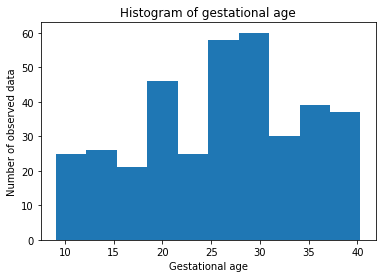

In [9]:
_ = plt.hist(y_train)
_ = plt.xlabel("Gestational age")
_ = plt.ylabel("Number of observed data")
_ = plt.title("Histogram of gestational age")
plt.show()

# Ridge regression 

In [10]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [11]:
# Setup the array of alphas and lists to store scores
# alpha_space = np.logspace(-4, 0, 50)
alpha_space = np.array([0.1, 1, 10, 100, 1000, 10000, 100000])
ridge_scores = []
ridge_scores_std = []

In [14]:
# Create ridge regression
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv = 10)
    
    # Append the mean of ridge_cv_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores
    ridge_scores_std.append(np.std(ridge_cv_scores))

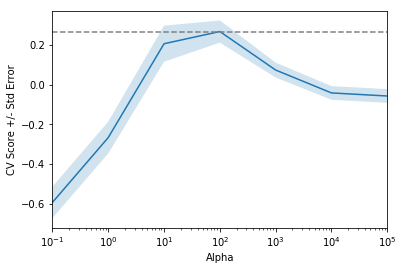

In [15]:
display_plot(ridge_scores, ridge_scores_std)